# Week 1 - Overview of Tensors

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
a = torch.Tensor([1,2,3,4,5])

In [ ]:
a.view(5,1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [ ]:
a.view(1,5)

tensor([[1., 2., 3., 4., 5.]])

In [ ]:
# convert np.array to torch

nparray = np.array([0,1,2,4,5,6])
ttensor = torch.from_numpy(nparray)
back_np = ttensor.numpy()

print(nparray)
print(ttensor)
print(back_np)

[0 1 2 4 5 6]
tensor([0, 1, 2, 4, 5, 6], dtype=torch.int32)
[0 1 2 4 5 6]


In [ ]:
pd_series = pd.Series([0.1,2,3,10.1])
pd_to_torch = torch.from_numpy(pd_series.values)

print(pd_series)
print(pd_to_torch)

0     0.1
1     2.0
2     3.0
3    10.1
dtype: float64
tensor([ 0.1000,  2.0000,  3.0000, 10.1000], dtype=torch.float64)


In [ ]:
new = torch.tensor([5,2,6,1])

new[0]
new[0].item()

5

In [ ]:
u = torch.tensor([0,1])
v = torch.tensor([1,0])

print(u+v)
print(u*v)
print(4*v)

tensor([1, 1])
tensor([0, 0])
tensor([4, 0])


In [ ]:
# universal functions

b = torch.tensor([1,-2,3,4,5])
b[3].item()

4

In [ ]:
# linspace

torch.linspace(-2,2,5)

tensor([-2., -1.,  0.,  1.,  2.])

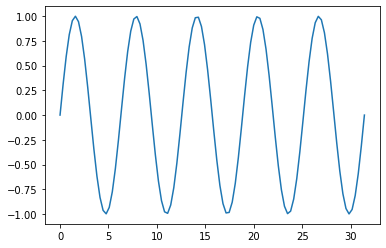

In [ ]:
# plotting math function
import matplotlib.pyplot as plt
%matplotlib inline

x = torch.linspace(0,10*np.pi,100)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy())

In [ ]:
u=torch.tensor([1,2])
v=torch.tensor([0,1])
torch.dot(u,v)

tensor(2)

In [ ]:
# two dimensional tensors
a = [[11,12,13],[21,22,23],[31,32,33]]
A = torch.tensor(a)
print(A)
print(A.ndimension())
print(A.shape)
print(A.size())
print(A.numel())

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
2
torch.Size([3, 3])
torch.Size([3, 3])
9


In [ ]:
A[0][2]

tensor(13)

In [ ]:
A = torch.tensor([[0,1,1],[1,0,1]])
B = torch.tensor([[1,1],[1,1],[-1,1]])
C = torch.mm(A,B)
print(C)

tensor([[0, 2],
        [0, 2]])


In [ ]:
# Differentiation in Pytorch
x = torch.tensor(2.0, requires_grad=True)
y = x**2
y.backward()
x.grad

tensor(4.)

In [ ]:
x = torch.tensor(2.0, requires_grad = True)
y = x**2 + 2*x +1

y.backward()
x.grad

tensor(6.)

In [ ]:
# Partial derivative
u = torch.tensor(1.0, requires_grad=True)
v = torch.tensor(2.0, requires_grad=True)

f = u*v + u**2
f.backward()
u.grad

tensor(4.)

The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.

In [ ]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

In [ ]:
class toy_set(Dataset):
    def __init__(self, length=100, transform=None):
        
        self.x = 2*torch.ones(length,2)
        self.y = torch.ones(length,1)
        self.len = length
        self.transform = transform
    
    def __getitem__(self,index):
        sample = self.x[index], self.y[index]
        if self.transform:
                sample = self.transform(sample)
        return sample
    
    def __len__(self):
        
        return self.len

In [ ]:
dataset = toy_set()
for i in range(3):
    x,y = dataset[i]
    print(i,'x:',x,'y:',y)

0 x: tensor([2., 2.]) y: tensor([1.])
1 x: tensor([2., 2.]) y: tensor([1.])
2 x: tensor([2., 2.]) y: tensor([1.])


In [ ]:
# transforms
class add_mult(object):
    
    # constructor
    def __init__(self, addx=1,muly=1):
        self.addx = addx
        self.muly = muly
    
    # executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x+self.addx
        y = y*self.muly
        sample = x,y
        return sample

In [ ]:
dataset = toy_set()
a_m = add_mult()
x_,y_ = a_m(dataset[0])

print(x_,y_)

tensor([3., 3.]) tensor([1.])


In [ ]:
dataset_= toy_set(transform = a_m)
dataset_[0]

(tensor([3., 3.]), tensor([1.]))

In [ ]:
# transforms compose
class mult(object):
    def __init__(self,mul=100):
        self.mul = mul
    
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x*self.mul
        y = y*self.mul
        sample = x,y
        return sample

In [ ]:
from torchvision import transforms

In [ ]:
data_transform = transforms.Compose([add_mult(),mult()])

In [ ]:
print(dataset[0])

x_, y_ = data_transform(dataset[0])
print(x_,y_)

(tensor([2., 2.]), tensor([1.]))
tensor([300., 300.]) tensor([100.])


In [ ]:
data_set_tr = toy_set(transform=data_transform)
print(data_set_tr[0])

(tensor([300., 300.]), tensor([100.]))


## Images

In [ ]:
# Datasets
import torch
import numpy as np
import pandas as pd
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset, DataLoader
import wget

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz'
data = wget.download(url)

url_index = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv'
data_index = wget.download(url_index)

100% [..........................................................................] 1680905 / 1680905

In [ ]:
wd = "C:/Users/Dinho/Google Drive/SummerJobLondon/summer2021/study_code/PyTorchStudies/data"
csv_file = 'index.csv'
csv_path = os.path.join(wd, csv_file)

In [ ]:
#data_name = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv')

data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [ ]:
print('File name:', data_name.iloc[1,1])
print('Class or y:', data_name.iloc[1,0])

File name: img/fashion1.png
Class or y: T-shirt


In [ ]:
image_name = data_name.iloc[1,1]
image_path = os.path.join(wd, image_name)

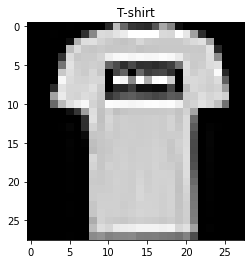

In [ ]:
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1,0])
plt.show()

In [ ]:
class Dataset(Dataset):
    def __init__(self, csv_file, data_dir, transform=None):
        
        self.transform = transform
        
        self.data_dir = data_dir
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        
        self.data_name = pd.read_csv(data_dircsv_file)
        
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx,1])
        image = Image.open(img_name)
        
        y = self.data_name.iloc[idx,0]
        
        if self.transform:
            image = self.transform(image)
        return image, y

In [ ]:
dataset = Dataset(csv_file=csv_file, data_dir=wd)
dataset[0]

(<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x28C7FF5F1F0>,
 'Ankle boot')

In [ ]:
import torchvision.transforms as transforms

In [ ]:
transforms.CenterCrop(20)
transforms.ToTensor()

ToTensor()

In [ ]:
croptensor_data_tr = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file = csv_file, data_dir = wd, transform=croptensor_data_tr)

## Prebuild Datasets and Transforms

In [ ]:
import torch
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [ ]:
# show data by diagram

def show_data(data_sample, shape = (28,28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap = 'gray')
    plt.title('y='+str(data_sample[1]))

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
dataset = dsets.MNIST(
    root = './data',
    download = False,
    transform = transforms.ToTensor())

c:\python38\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  5
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


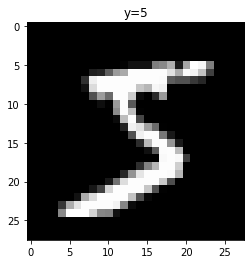

In [ ]:
show_data(dataset[0])

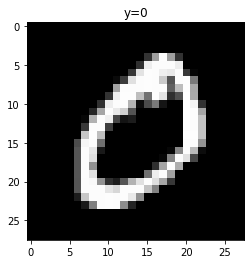

In [ ]:
show_data(dataset[1])

In [ ]:
# transform

crop_data_tr = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = crop_data_tr)

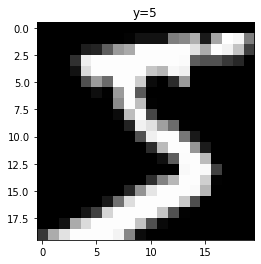

In [ ]:
show_data(dataset[0], shape = (20,20))

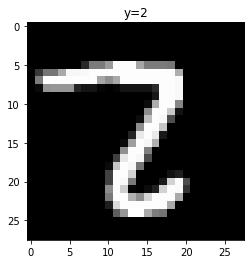

In [ ]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image

random_data_tr = transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = random_data_tr )
show_data(dataset[1])

# Week 2 - Linear Regression

In [ ]:
import torch

In [ ]:
w = torch.tensor(2.0, requires_grad= True)
b = torch.tensor(-1.0, requires_grad= True)

def forward(x):
  y = w*x+b
  return y

x = torch.tensor([[1.0], [3.0]])
yhat = forward(x)
yhat

tensor([[1.],
        [5.]], grad_fn=<AddBackward0>)

The tensors *a* and *b* are parameters of model and we have to learn them, so we set the parameter *requires_grad=True*.



In [ ]:
import torch.nn as nn

In [ ]:
torch.manual_seed(1)

In [ ]:
#1D linear regression model
model = nn.Linear(in_features=1, out_features=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [ ]:
x = torch.tensor([[1.0],[2.0]])
yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [ ]:
# custom modules
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.linear(x)
    return out

model = LinearRegression(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.9414]], requires_grad=True), Parameter containing:
tensor([0.5997], requires_grad=True)]


In [ ]:
x = torch.tensor([[1.0],[3.0], [6.0]])
yhat = model(x)
yhat

tensor([[-0.3417],
        [-2.2246],
        [-5.0489]], grad_fn=<AddmmBackward>)

- Illustration of a dataset using mathematical notation:

$$D=\{(x_{1}, y_{1}), \dots, (x_{N}, y_{N})\}$$

- Mean Squared Error or Cost Function
$$L(w,b) = \frac{1}{N}\sum^{N}_{n=1}(y_{n}-(wx_{n}+b))^{2}$$

The Loss lets you know how good your estimate is and is dependent on your parameter value.

To find the best value for the slope we use the minimum $\frac{dl(w)}{dw}=0$.

### Gradient Descent

$$w^{0}$$
$$w^{1}=w^{0}-\eta\frac{dl(w^{0}}{dw}$$
$$w^{2}=w^{1}-\eta\frac{dl(w^{1}}{dw}$$
$$w^{k+1}=w^{k}-\eta\frac{dl(w^{k}}{dw}$$
$$\eta=\text{learning rate}$$

When stop gradient descent?

- See when the losses start to increase;

### Cost

$$\frac{dl(w)}{dw}=-\frac{2}{N}\sum^{N}_{n=1}(y_{n}-wx_{n})x_{n}$$

# Week 2 - Linear Regression

In [3]:
import torch
import matplotlib.pyplot as plt

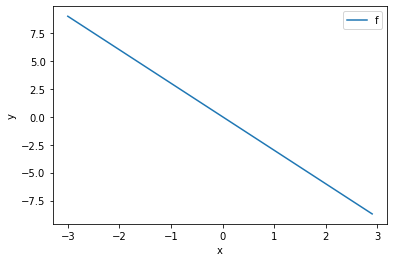

In [26]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)
f = -3*X

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

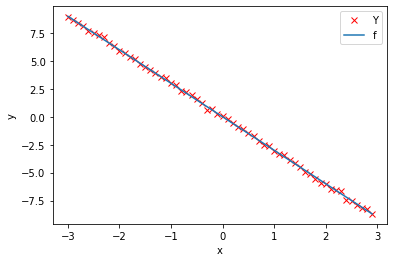

In [27]:
Y = f+0.1*torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [24]:
def forward(x):
  return w*x

def criterion(yhat,y):
  return torch.mean((yhat-y)**2)

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')  

In [30]:
lr = 0.2
LOSS = []

gradient_plot = plot_diagram(X,Y,w,stop=5)

In [31]:
def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

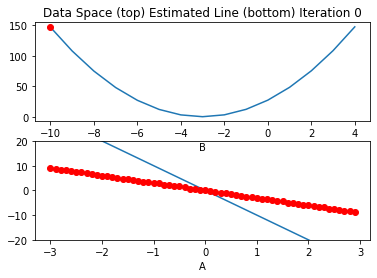

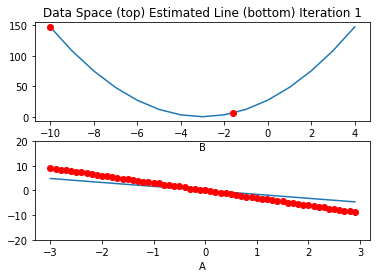

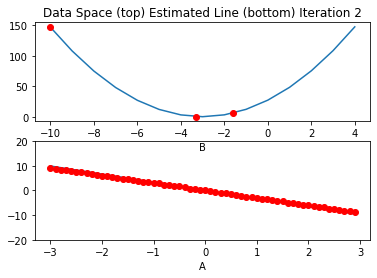

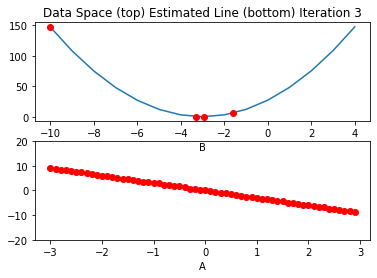

<Figure size 432x288 with 0 Axes>

In [32]:
train_model(4)

Text(24.0, 0.5, 'Cost')

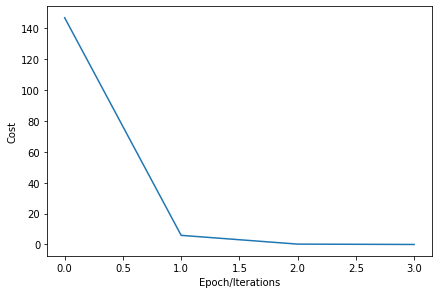

In [33]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel('Epoch/Iterations')
plt.ylabel('Cost')

# Pytorch Linear Regression Training Slope and Bias

In [1]:
# define the cost surface in hard way with PyTroch
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [3]:
# f(X) with a slope of 1 and a bias of -1 

X = torch.arange(-3,3,0.1).view(-1,1)
f = 1*X-1

# add noise
Y = f+0.1*torch.randn(X.size())

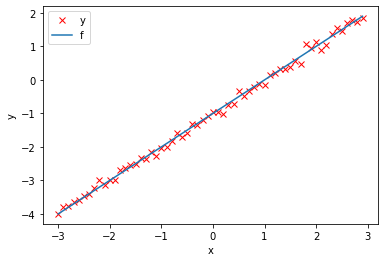

In [4]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [5]:
def forward(x):
    return w*x+b

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

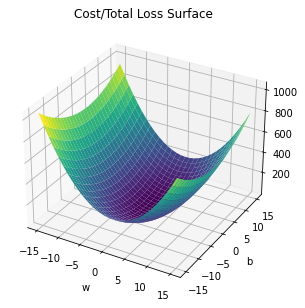

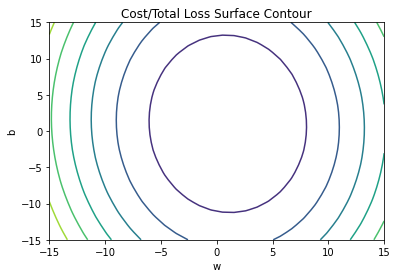

In [6]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [7]:
# parameters 

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [8]:
lr = 0.1
LOSS = []

In [9]:
def train_model(iter):
    
    for epoch in range(iter):
        
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
         
        get_surface.set_para_loss(w.data.tolist(),b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        
        LOSS.append(loss.item())
        
        loss.backward()
        
        w.data = w.data-lr*w.grad.data
        b.data = b.data-lr*b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()

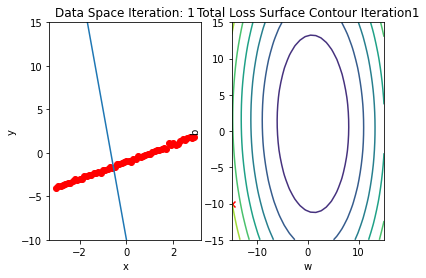

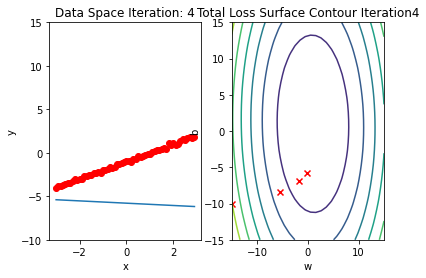

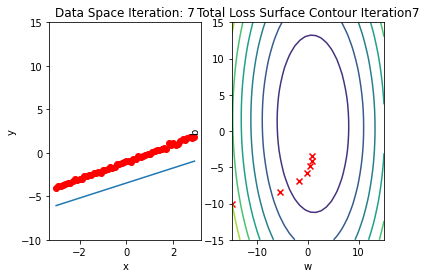

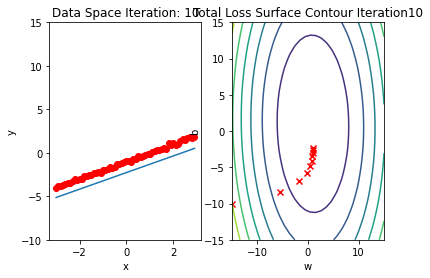

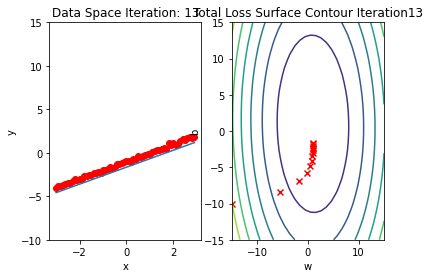

In [10]:
train_model(15)

In [11]:
LOSS

[834.2314453125,
 175.47604370117188,
 55.142494201660156,
 26.185707092285156,
 15.316136360168457,
 9.579586029052734,
 6.101221561431885,
 3.9048409461975098,
 2.5032503604888916,
 1.6064656972885132,
 1.0322915315628052,
 0.6646111607551575,
 0.42915189266204834,
 0.27836447954177856,
 0.1818004995584488]

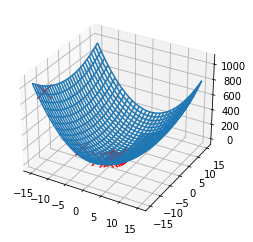

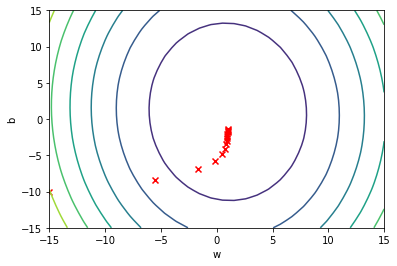

Text(24.125, 0.5, 'Cost')

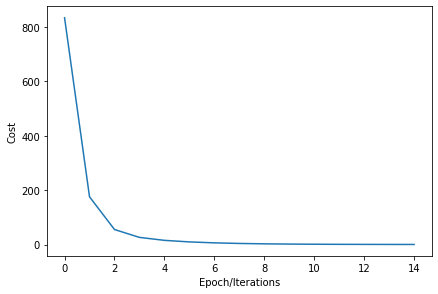

In [12]:
# plot the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

## Stochastic Gradient